##### Work in progress

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('JaxHousingData.csv', index_col=0)
df['ppsf'] = df['price']/df['heated_sf']
df.shape

(58693, 73)

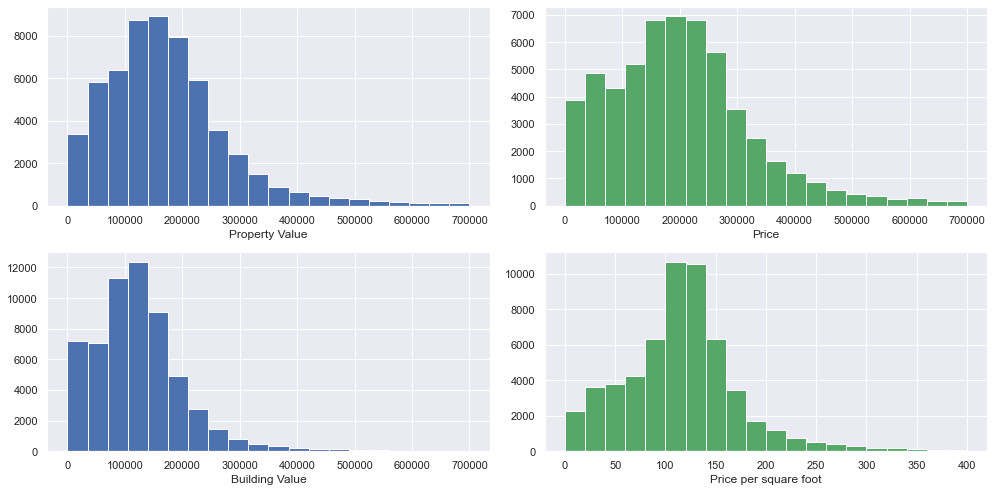

In [20]:
sns.set()
plt.figure(figsize=(14,7))
_ = plt.subplot(2,2,1)
_ = plt.hist(df['property_value'], bins=20, range=(0,700000), color='b')
_ = plt.xlabel('Property Value')
_ = plt.subplot(2,2,2)
_ = plt.hist(df['price'], bins=20, range=(0,700000), color='g')
_ = plt.xlabel('Price')
_ = plt.subplot(2,2,3)
_ = plt.hist(df['bldng_value'], bins=20, range=(0,700000), color='b')
_ = plt.xlabel('Building Value')
_ = plt.subplot(2,2,4)
_ = plt.hist(df['ppsf'], bins=20, range=(0,400), color='g')
_ = plt.xlabel('Price per square foot')
plt.tight_layout()

In [21]:
df.columns

Index(['RE', 'mailing_address', 'mailing_city', 'mailing_state',
       'property_use', 'subdivision', 'neighborhood', 'property_value',
       'county_taxable', 'total_sf', 'acres', 'building', 'type_descr',
       'style', 'class', 'quality', 'yr_built', 'perc_complete', 'bldng_value',
       'heated_sf', 'trans_id', 'seller', 'sale_date', 'price', 'baths',
       'bedrooms', 'rooms', 'stories', 'cov_patio', 'covpatio_avg_grade',
       'covpatio_avg_ppu', 'covpatio_avg_yr_built',
       'covpatio_total_depreciated', 'deck_ft', 'deckft_avg_grade',
       'deckft_avg_ppu', 'deckft_avg_yr_built', 'deckft_total_depreciated',
       'fireplace', 'fireplace_avg_grade', 'fireplace_avg_ppu',
       'fireplace_avg_yr_built', 'fireplace_total_depreciated', 'pool',
       'pool_avg_grade', 'pool_avg_ppu', 'pool_avg_yr_built',
       'pool_total_depreciated', 'additions', 'addition_area',
       'addition_effec', 'addition_heated', 'carports', 'carport_area',
       'carport_effec', 'garages', 

In [22]:
reduced = df[['subdivision','neighborhood','mailing_address', 'mailing_state', 'bedrooms','baths','rooms','stories',
             'property_value','county_taxable','total_sf','type_descr','style','class','quality',
             'yr_built','heated_sf','sale_date','price','cov_patio','deck_ft','fireplace',
             'pool','additions','carports','garages','porches','storages','upper_stories','ppsf']]
reduced.shape

(58693, 30)

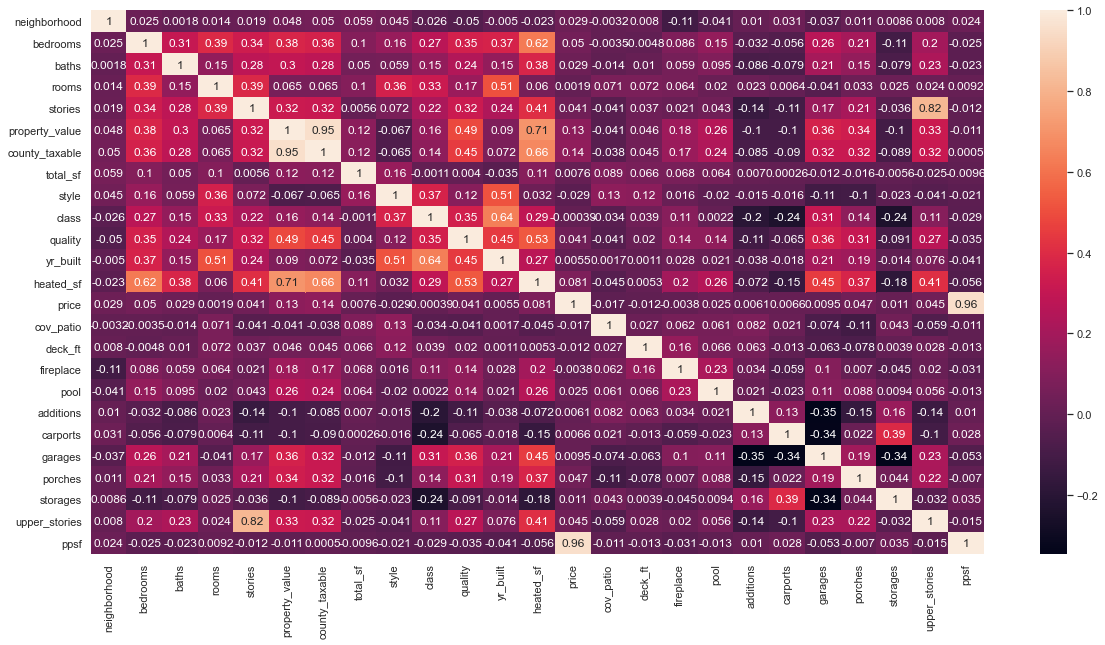

In [24]:
plt.figure(figsize=(20,10))
im = sns.heatmap(reduced.corr(), annot=True)

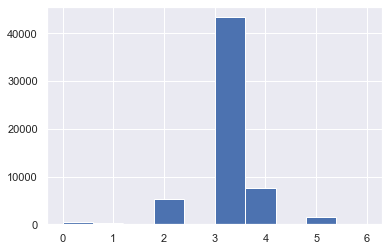

In [25]:
_ = plt.hist(df['quality'])

In [28]:
df.baths.value_counts()

2.0      29884
1.0       9141
2.5       8541
3.0       5196
1.5       2159
3.5       1546
4.0       1105
0.0        409
4.5        371
5.0        163
5.5         78
6.5         32
6.0         29
7.5         14
7.0         13
8.0          5
2.4          1
9.0          1
324.0        1
10.0         1
20.0         1
8.5          1
12.0         1
Name: baths, dtype: int64

In [45]:
df = df[df['baths']<10]
df.baths.value_counts()

2.0    29884
1.0     9141
2.5     8541
3.0     5196
1.5     2159
3.5     1546
4.0     1105
0.0      409
4.5      371
5.0      163
5.5       78
6.5       32
6.0       29
7.5       14
7.0       13
8.0        5
2.4        1
8.5        1
9.0        1
Name: baths, dtype: int64

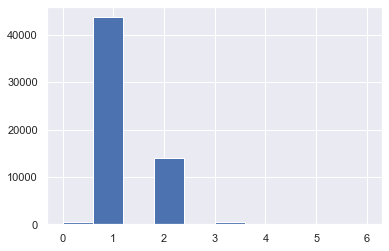

In [49]:
_ = plt.hist(df.stories)

In [54]:
investors = []
for address in df.mailing_address:
    if address.count()

745


In [55]:
type(df.mailing_address.value_counts())

pandas.core.series.Series

In [59]:
investors = pd.DataFrame(df.mailing_address.value_counts()).reset_index()
investors.rename(columns={'index':'address','mailing_address':'homes'},inplace=True)
investors = investors[investors.homes >= 10]
investors

,address,homes
0,5001 PLAZA ON THE LAKE STE 200,745
1,P O BOX 4090,416
2,7563 PHILIPS HWY SUITE 208,266
3,3721 DUPONT STATION CT,262
4,7563 PHILIPS HWY STE 208,210
...,...,...
118,3030 N ROCKY POINT DR STE 150A,10
119,P O BOX 450841,10
120,5220 SHAD RD STE 202,10
121,417 CONVEX LN,10


In [65]:
jwb = []
for address in investors.address:
    if ('7563 PHILIPS' and '208') in address:
        print(address)
        jwb.append(address)

7563 PHILIPS HWY SUITE 208
7563 PHILIPS HWY STE 208
7563 PHILIPS HWY BLDG 100 STE 208
7563  PHILIPS HWY SUITE 208


In [70]:
jwb_df = pd.DataFrame()
for address in jwb:
    jwb_df = jwb_df.append(investors[investors.address == address])
jwb_df

,address,homes
2,7563 PHILIPS HWY SUITE 208,266
4,7563 PHILIPS HWY STE 208,210
40,7563 PHILIPS HWY BLDG 100 STE 208,23
100,7563 PHILIPS HWY SUITE 208,11


In [71]:
jwb_df = pd.DataFrame()
for address in jwb:
    jwb_df = jwb_df.append(df[df.mailing_address == address])
jwb_df

,RE,mailing_address,mailing_city,mailing_state,property_use,subdivision,neighborhood,property_value,county_taxable,total_sf,...,porch_unfinished,storages,storage_area,storage_effec,storage_unfinished,upper_stories,upper_story_area,upper_story_effec,upper_story_heated,ppsf
605,002060 1665,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,ADAMS LAKE UNIT 02,413721.22,171695,171695,8684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2989.229422
939,002061 0510,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,OLD GAINESVILLE ESTATES,413721.32,164601,164601,9055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4035.106383
2948,007466 1220,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,BENT TREE,512000.25,93518,93518,3277,...,0.0,0.0,0.0,0.0,0.0,1.0,975.0,926.0,975.0,399.942890
2957,007466 1270,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,BENT TREE,512000.25,92088,92088,2177,...,0.0,0.0,0.0,0.0,0.0,1.0,927.0,881.0,927.0,1057.824773
3953,009062 3300,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,PINECREST,511902.37,202818,202818,17504,...,0.0,0.0,0.0,0.0,0.0,1.0,1634.0,1552.0,1634.0,642.971619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33055,122127 0010,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,OAKLAND,101000.21,28419,28419,3383,...,2.0,1.0,24.0,10.0,1.0,0.0,0.0,0.0,0.0,11.099692
33056,122127 0020,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,0,OAKLAND,101000.21,8375,8375,4126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf
33064,122271 0000,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,0,OAKLAND,117400.22,4554,4554,2797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf
33755,126461 0000,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,200,LARSEN ANNEX,316300.25,10323,10323,4998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.071429


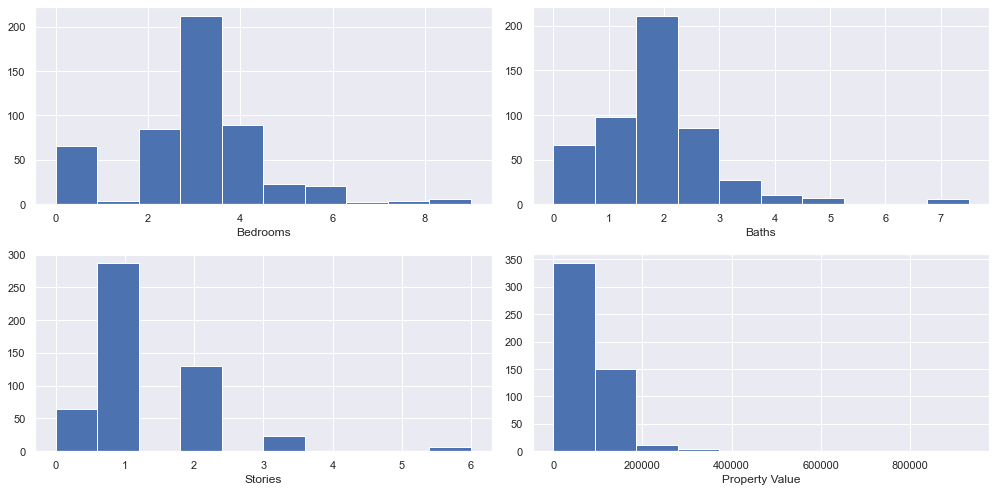

In [76]:
plt.figure(figsize=(14,7))
_ = plt.subplot(2,2,1)
_ = plt.hist(jwb_df['bedrooms'])
_ = plt.xlabel('Bedrooms')
_ = plt.subplot(2,2,2)
_ = plt.hist(jwb_df['baths'])
_ = plt.xlabel('Baths')
_ = plt.subplot(2,2,3)
_ = plt.hist(jwb_df['stories'])
_ = plt.xlabel('Stories')
_ = plt.subplot(2,2,4)
_ = plt.hist(jwb_df['property_value'])
_ = plt.xlabel('Property Value')
plt.tight_layout()

In [77]:
jwb_df[jwb_df.stories==6][['RE','type_descr','trans_id']]

,RE,type_descr,trans_id
12953,029702 0005,SFR 2 STORY,18274-1206
12954,029702 0005,SFR 2 STORY,18274-1206
12955,029702 0005,SFR 2 STORY,18274-1206
12956,029702 0005,SFR 2 STORY,18321-1921
12957,029702 0005,SFR 2 STORY,18321-1921
12958,029702 0005,SFR 2 STORY,18321-1921


In [75]:
jwb_df.subdivision.value_counts()

OAKWOOD VILLA ESTATES      98
JAX HEIGHTS TOWNSITE       16
TIMOTHYS LANDING UNIT 1    11
MELSONS ADDITION TO JAX    10
SECTION LAND                9
                           ..
OAK HILL UNIT 08            1
SHADOW WOOD                 1
BELLINGER TERRACE           1
OSCEOLA FOREST UNIT 01      1
LANIER HEIGHTS              1
Name: subdivision, Length: 219, dtype: int64

In [80]:
print(len(jwb_df.trans_id.unique()))
print(len(jwb_df))

225
510


In [81]:
jwb_df.head(60)

,RE,mailing_address,mailing_city,mailing_state,property_use,subdivision,neighborhood,property_value,county_taxable,total_sf,...,porch_unfinished,storages,storage_area,storage_effec,storage_unfinished,upper_stories,upper_story_area,upper_story_effec,upper_story_heated,ppsf
605,002060 1665,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,ADAMS LAKE UNIT 02,413721.22,171695,171695,8684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2989.229422
939,002061 0510,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,OLD GAINESVILLE ESTATES,413721.32,164601,164601,9055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4035.106383
2948,007466 1220,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,BENT TREE,512000.25,93518,93518,3277,...,0.0,0.0,0.0,0.0,0.0,1.0,975.0,926.0,975.0,399.942890
2957,007466 1270,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,BENT TREE,512000.25,92088,92088,2177,...,0.0,0.0,0.0,0.0,0.0,1.0,927.0,881.0,927.0,1057.824773
3953,009062 3300,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,PINECREST,511902.37,202818,202818,17504,...,0.0,0.0,0.0,0.0,0.0,1.0,1634.0,1552.0,1634.0,642.971619
4226,010214 0000,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,NORMANDY VILLAGE UNIT 10,412703.23,99949,99949,8651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4954.571843
4264,010378 0665,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,HYDE GROVE OAKS,412602.25,136145,136145,5680,...,0.0,0.0,0.0,0.0,0.0,1.0,781.0,742.0,781.0,92.721372
4445,011394 0050,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,LACKAWANNA TOWNSITE,412601.21,153035,147469,9240,...,0.0,0.0,0.0,0.0,0.0,1.0,978.0,929.0,978.0,3937.370242
4446,011394 0060,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,LACKAWANNA TOWNSITE,412601.21,153035,147469,9316,...,0.0,0.0,0.0,0.0,0.0,1.0,978.0,929.0,978.0,3937.370242
4447,011394 0070,7563 PHILIPS HWY SUITE 208,JACKSONVILLE,FL,100,LACKAWANNA TOWNSITE,412601.21,128315,123759,7570,...,0.0,0.0,0.0,0.0,0.0,1.0,533.0,506.0,533.0,4267.125000
